## 动量法——从零开始
我们已经介绍了梯度下降。每次迭代时，该算法根据自变量当前所在位置，沿着目标函数下降最快的方向更新自变量。因此，梯度下降有时也叫做最陡下降（steepest descent）。目标函数有关自变量的梯度代表了目标函数下降最快的方向。

### 梯度下降的问题
给定目标函数，在梯度下降中，自变量的迭代方向仅仅取决于自变量当前位置。这可能会带来一些问题。

考虑一个输入和输出分别为二维向量$x=[x1,x2]^⊤$和标量的目标函数$f:ℝ^2→ℝ$。图7.3展示了该函数的等高线示意图。

![image.png](http://zh.gluon.ai/_images/gd-move.svg)

目标函数$f$的等高线图和自变量$[x_1,x_2]$在梯度下降中的迭代。每条等高线（椭圆实线）代表所有函数值相同的自变量的坐标。实心圆代表自变量初始坐标。每个箭头头部代表自变量在每次迭代后的坐标。

由于目标函数在竖直方向（$x_2$轴方向）比在水平方向（$x_1$轴方向）更弯曲，给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。因此，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。然而，这造成了图7.3中自变量向最优解移动较慢。

### 动量法
动量法的提出是为了应对梯度下降的上述问题。广义上，以小批量随机梯度下降为例（当批量大小等于训练集样本数时，该算法即为梯度下降；批量大小为1时即为随机梯度下降），我们对小批量随机梯度算法在每次迭代的步骤做如下修改：

\begin{align*}
\boldsymbol{v} &\leftarrow \gamma \boldsymbol{v} + \eta \nabla f_\mathcal{B}(\boldsymbol{x}),\\
\boldsymbol{x} &\leftarrow \boldsymbol{x} - \boldsymbol{v}.
\end{align*}

其中$\boldsymbol{v}$是速度变量，动量超参数$\gamma$满足$0≤\gamma≤1$。动量法中的学习率$\eta$和有关小批量$\mathcal{B}$的随机梯度$\nabla f_\mathcal{B}(\boldsymbol{x})$已在“梯度下降和随机梯度下降”一节中描述。

### 指数加权移动平均
为了更清晰地理解动量法，让我们先解释指数加权移动平均（exponentially weighted moving average）。给定超参数$0≤\gamma≤1$且$0≤\gamma≤1$，当前时刻$t$的变量$y^{(t)}$是上一时刻$t−1$的变量$y^{(t−1)}$和当前时刻另一变量$x(t)$的线性组合：
\begin{align*}
y^{(t)} = \gamma y^{(t-1)} + (1-\gamma) x^{(t)}.
\end{align*}
我们可以对$y(t)$展开：

\begin{align*}
y^{(t)}  &= (1-\gamma) x^{(t)} + \gamma y^{(t-1)}\\
         &= (1-\gamma)x^{(t)} + (1-\gamma) \cdot \gamma x^{(t-1)} + \gamma^2y^{(t-2)}\\
         &= (1-\gamma)x^{(t)} + (1-\gamma) \cdot \gamma x^{(t-1)} + (1-\gamma) \cdot \gamma^2x^{(t-2)} + \gamma^3y^{(t-3)}\\
         &\ldots
\end{align*}

由于

\begin{align*}
\lim_{n \rightarrow \infty}  (1-\frac{1}{n})^n = \exp(-1) \approx 0.3679,
\end{align*}

我们可以将$\gamma^{1/(1-\gamma)}$近似为$\exp(-1)$。例如$0.95^{20}≈\exp(-1)$。如果把$\exp(-1)$当做一个比较小的数，我们可以在近似中忽略所有含$\gamma^{1/(1-\gamma)}$和比$\gamma^{1/(1-\gamma)}$更高阶的系数的项。例如，当$\gamma=0.95$时，

\begin{align*}
y^{(t)} \approx 0.05\sum_{i=0}^{19} 0.95^i x^{(t-i)}.
\end{align*}

因此，在实际中，我们常常将y看作是对最近$1/(1−\gamma)$个时刻的x值的加权平均。例如，当$\gamma=0.95$时，$y$可以被看作是对最近20个时刻的$x$值的加权平均；当$\gamma$=0.9时，$y$可以看作是对最近10个时刻的$x$值的加权平均：离当前时刻越近的$x$值获得的权重越大。

### 由指数加权移动平均理解动量法
现在，我们对动量法的速度变量做变形：

\begin{align*}
\boldsymbol{v} \leftarrow \gamma \boldsymbol{v} + (1 - \gamma) \frac{\eta \nabla f_\mathcal{B}(\boldsymbol{x})}{1 - \gamma}.
\end{align*}

由指数加权移动平均的形式可得，速度变量$\boldsymbol{v}$实际上对$(\eta\nabla f_\mathcal{B}(\boldsymbol{x})) /(1-\gamma)$做了指数加权移动平均。给定动量超参数$\gamma$和学习率$\eta$，含动量法的小批量随机梯度下降可被看作使用了特殊梯度来迭代目标函数的自变量。这个特殊梯度是最近$1/(1-\gamma)$个时刻的$\nabla f_\mathcal{B}(\boldsymbol{x})/(1-\gamma)$的加权平均。

给定目标函数，在动量法的每次迭代中，自变量在各个方向上的移动幅度不仅取决当前梯度，还取决过去各个梯度在各个方向上是否一致。图7.4展示了使用动量法的梯度下降迭代图7.3中目标函数自变量的情景。我们将每个梯度代表的箭头方向在水平方向和竖直方向做分解。由于所有梯度的水平方向为正（向右）、在竖直上时正（向上）时负（向下），自变量在水平方向移动幅度逐渐增大，而在竖直方向移动幅度逐渐减小。这样，我们就可以使用较大的学习率，从而使自变量向最优解更快移动。

![image.png](http://zh.gluon.ai/_images/momentum-move.svg)

目标函数$f$的等高线图和自变量$[x_1, x_2]$在使用动量法的梯度下降中的迭代。每条等高线（椭圆实线）代表所有函数值相同的自变量的坐标。实心圆代表自变量初始坐标。每个箭头头部代表自变量在每次迭代后的坐标。



## 动量法的实现
动量法的实现也很简单。我们在小批量随机梯度下降的基础上添加速度变量。



In [38]:
def sgd_momentum(params, grads, vs, lr, mom, batch_size):
    for param, grad, v in zip(params, grads, vs):
        v[:] = mom * v + lr * grad / batch_size
        param[:] -= v
    return params, vs

## 实验
首先，导入本节中实验所需的包。

In [39]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sys
import numpy as np
import random

sys.path.append('..')

实验中，我们以之前介绍过的线性回归为例。设数据集的样本数为1000，我们使用权重w为[2, -3.4]，偏差``b``为4.2的线性回归模型来生成数据集。该模型的平方损失函数即所需优化的目标函数，模型参数即目标函数自变量。



In [40]:
# 生成数据集。
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = np.random.normal(scale=1, size=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += 0.01 * np.random.normal(scale=1, size=y.shape)

# 初始化模型参数。
def init_params():
    w = np.random.normal(scale=1, size=(num_inputs, 1))
    b = np.zeros((1,))
    vs = []
    params = [w, b]
    for param in params:
        vs.append(np.zeros(param.shape))
    return params, vs

# 构造迭代器。
def data_iter(batch_size):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for batch_i, i in enumerate(range(0, num_examples, batch_size)):
        j = np.array(idx[i: min(i + batch_size, num_examples)])
        yield batch_i, X[j], y[j]

# 线性回归模型。
def net(X, w, b):
    return np.dot(X, w) + b

# 损失函数。
def square_loss(yhat, y):
    return (yhat - np.reshape(y, yhat.shape)) ** 2 / 2

def cal_grad(yhat, y, X):
    grad_w = np.expand_dims(np.array([-np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 0]), -np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 1])]), axis=1)
    #grad_w = np.array([-np.dot((yhat - np.reshape(y, yhat.shape)).T, X[:, 0])])
    grad_b = -np.sum((yhat - np.reshape(y, yhat.shape)))
    return [grad_w, grad_b]

优化函数optimize与“梯度下降和随机梯度下降——从零开始”一节中的类似。

In [43]:
import matplotlib as mpl

import matplotlib.pyplot as plt

def train(batch_size, lr, mom, epochs, period):
    [w, b], vs = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y))]
    # 注意epoch从1开始计数。
    for epoch in range(1, epochs + 1):
        # 学习率自我衰减。
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            output = net(data, w, b)
            loss = square_loss(output, label)
            grad =  cal_grad(label, output, data)
            [w, b], vs = sgd_momentum([w, b], grad, vs, lr, mom, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(
                    np.mean(square_loss(net(X, w, b), y)))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w, (1, -1)),
          'b:', b, '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    mpl.rcParams['figure.figsize'] = 3.5, 2.5
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

我们先将动量超参数$\gamma$（mom）设0.99。此时，小梯度随机梯度下降可被看作使用了特殊梯度：这个特殊梯度是最近100个时刻的100$\nabla f_\mathcal{B}(\boldsymbol{x})$的加权平均。我们观察到，损失函数值在3个迭代周期后上升。这很可能是由于特殊梯度中较大的系数100造成的。


Batch size 10, Learning rate 0.200000, Epoch 1, loss 4.0917e+01
Batch size 10, Learning rate 0.200000, Epoch 2, loss 1.3378e+03
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.5420e+04
('w:', array([[-140.23408698, -308.18506502]]), 'b:', array([-33.09284146]), '\n')


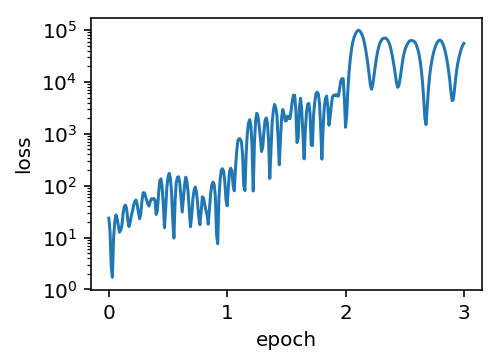

In [53]:
train(batch_size=10, lr=0.2, mom=0.99, epochs=3, period=10)

In [ ]:
假设学习率不变，为了降低上述特殊梯度中的系数，我们将动量超参数$\gamma$（mom）设0.9。此时，上述特殊梯度变成最近10个时刻的10$\nabla f_\mathcal{B}(\boldsymbol{x})$的加权平均。我们观察到，损失函数值在3个迭代周期后下降。


Batch size 10, Learning rate 0.200000, Epoch 1, loss 3.7378e-03
Batch size 10, Learning rate 0.200000, Epoch 2, loss 7.4427e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.1485e-05
('w:', array([[ 2.00041637, -3.40068217]]), 'b:', array([4.19975447]), '\n')


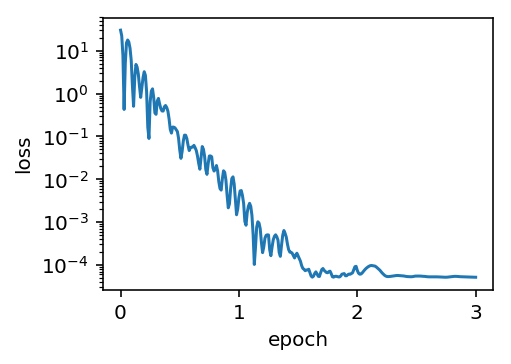

In [47]:
train(batch_size=10, lr=0.2, mom=0.9, epochs=3, period=10)


继续保持学习率不变，我们将动量超参数$\gamma$（mom）设0.5。此时，小梯度随机梯度下降可被看作使用了新的特殊梯度：这个特殊梯度是最近2个时刻的2$\nabla f_\mathcal{B}(\boldsymbol{x})$的加权平均。我们观察到，损失函数值在3个迭代周期后下降，且下降曲线较平滑。最终，优化所得的模型参数值与它们的真实值较接近。


Batch size 10, Learning rate 0.200000, Epoch 1, loss 5.3351e-05
Batch size 10, Learning rate 0.200000, Epoch 2, loss 5.1636e-05
Batch size 10, Learning rate 0.020000, Epoch 3, loss 5.1148e-05
('w:', array([[ 2.00110828, -3.40053602]]), 'b:', array([4.20102817]), '\n')


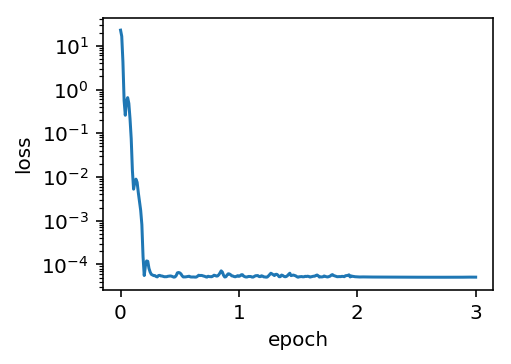

In [50]:
train(batch_size=10, lr=0.2, mom=0.5, epochs=3, period=10)
